# Project: No-show appointments data analysis and visualization

## Table of Contents
<ul>
<li><a href="#introduction">INTRODUCTION</a></li>
    <li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">DATA WRANGLING</a></li>
    <ul>
         <li><a href="#section_objectives">Section objectives</a></li>
        <li><a href="#loading_libraries">Loading libraries</a></li>
        <li><a href="#loading_dataset">Loading dataset</a></li>
        <li><a href="#exploring_data">Exploring data</a></li> 
         <li><a href="#descriptive_info">Descriptive information about the dataset</a></li> 
         <li><a href="#data_shape">Shape of the dataset</a></li> 
         <li><a href="#statistical_data">Statistical data</a></li> 
     </ul>
<li><a href="#cleaning_data">DATA CLEANING</a></li>
     <ul>
        <li><a href="#renamed_columns">Renaming columns</a></li>
        <li><a href="#converting_date">Converting date</a></li> 
         <li><a href="#filtering_row">Filtering row Age with -1 </a></li> 
         <li><a href="#dropping_age">Dropping negative Age</a></li>
         <li><a href="#checking_age-1">Checking negative Age</a></li>
         <li><a href="#converting_ID">Converting PatientId and AppointmentId to object data type</a</li>
         <li><a href="#min_age">Displaying minimun value of age</a</li>
         <li><a href="#filtering_0age">Filtering and displaying row with Age==0</a</li>
         <li><a href="#drop_minAge">Dropping Age==0</a</li>   
          <li><a href="#missing_values">Checking missing values</a</li>
          <li><a href="#duplicated_values">Checking duplicated values</a</li> 
          <li><a href="#cleaned_dataset">Cleaned dataset</a</li> 
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
         <li><a href="#no-show_distribution">Pie plot of No-show patients </a</li>
          <li><a href="#hypertension_distribution">Pie plot of gender,hypertenstion and No-show</a</li>
          <li><a href="#diabetes_distribution">Pie plot of gender,diabetes and No-show</a</li>
          <li><a href="#SMS_received_distribution">Pie plot of gender,SMS_received and No-show</a</li> 
          <li><a href="#gender_distribution">Pie plot of gender and No-show</a</li> 
            <li><a href="#function_distribution"> Function to plot the distribution in the research  question</a</li> 
            <li><a href="#no-show_distributionbar"> No-show gender distribution</a</li> 
            <li><a href="#diabetes_distributionbar">Diabetes No-show gender distribution </a</li> 
             <li><a href="#hypertension_distributionbar">Hypertension No-show gender distribution</a</li> 
               <li><a href="#SMS_distributionbar">SMS_received No-show gender distribution</a</li> 
              <li><a href="#Age_distributionbar">Age No-show gender distribution</a</li> 
<li><a href="#conclusions">Conclusion</a></li>
<li><a href="#limitations">Limitations</a></li>



<a id='introduction'></a>
## Introduction
<b>
The dataset subject to our analysis contains information recorded from a hospital in Brazil. The dataset has 110,527 data entries starting from 0 to 110526 and 14 columns.<br> The description of each feature variable is shown as below <br><hr>
PatientId: Identification of a patient
AppointmentId: Identification of each appointment <br>
Gender: Male or Female <br>
ScheduledDay: The day when the patient scheduled their appointment<br>
AppointmentDay: The day of the appointment <br>
Age:  Age of the patient <br>
Neighbourhood:  Address  of the hospital where the appointment is taken <br>
Scholarship: Boolean 1 if the patient is enrolled into Brazilian welfare program Bolsa Familia 0 otherwise<br>
Hipertension:  Patient has hipertension Yes boolean 1; 0 otherwise <br>
Diabetis: Patient has diabetis Yes boolean 1 or 0 otherwise 
Alcoholism: Patient drink alcohol Yes boolean 1 or 0 otherwise <br>
Handcap: Patient is Handicap Yes boolean 1 or 0 otherwise
SMS_received: Patient received a SMS before the appointment Yes boolean 1 or 0 otherwise <br>
No-show: YES boolean 1 if the patient show up during the booking day  0 otherwise <br>

<hr>

From the description above, the aim of this project is to find out which population of the patient, ill health and disability condition show up or does not to their respective appointment. 
<hr>


 <a id='questions'></a>
## Questions
The research question durant the brainstorming phase of our analysis are:<br>
1- What is the distribution of the patient that showed up and did not show up during the appointment<br>
2- What is the distribution of the patients having or not having  Hypertension showed up and did not show up during the appointment?<br>
3-  What is the distribution of the patients having or not having  diabetes showed up and did not show up during the appointment?<br>
4-  What is the distribution of the patients who (received or did not a SMS) showed up and did not show up during the appointment?<br>
<b>



<a id='wrangling'></a>
## Data Wrangling



<a id='section_objectives'></a>
## Section objective
In this section:<br>We load in the data<br>We explore the data<br> We clean the dataset<br> We preprocess the dataset for visualization and further analysis.

<a id="loading_libraries"></a>
## Loading the required libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

<a id="loading_dataset"></a>
## Loading the dataset 

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

<a id="exploring_data"></a>
## Exploring the dataset

#### Displaying the 5 five observations of the dataset

In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


<a id="descriptive_info"></a>
## Descriptive information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<b>
The dataset has 14 non null features contaning respectively<br>
1 data type FLOAT  PatientId<br>
8 data type INTEGER namely AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received<br>
5 data type STRING  namely Gender,ScheduledDay,AppointmentDay, Neighbourhood,No-show
</b>

<a id="data_shape"></a>
## 2- Displaying the shape of the data

In [6]:
df.shape

(110527, 14)

<b>The dataset has 110527 rows which represent the number of observations and 14 columns which represent the number of feature variables


<a id="statistical_data"></a>
## 3- Displaying the statistical analysis of the dataset

In [7]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<b> From the statistical data above we notice a lot of discrepancies in the dataset. We need to covert it to integer

In [8]:
df.describe().astype('int64') 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527,110527,110527,110527,110527,110527,110527,110527,110527
mean,147496265710394,5675305,37,0,0,0,0,0,0
std,256094920291739,71295,23,0,0,0,0,0,0
min,39217,5030230,-1,0,0,0,0,0,0
25%,4172614444192,5640285,18,0,0,0,0,0,0
50%,31731838713978,5680573,37,0,0,0,0,0,0
75%,94391720898175,5725523,55,0,0,0,0,0,1
max,999981631772427,5790484,115,1,1,1,1,4,1


<b>
- We notice there is a negative value in the Age colunm<br>
- Besides, PatientID is in float data type  we need to convert it in String<br> 
- There is columns data mispelling such as hipertension and handcap<br>
- PatientId and AppointmentId are irrelevant to our analysis we need to convert them to String data type
    </b>

## Exploring the Age of the patient closely

In [9]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

We observe that the mean of the age of the patient is 38
The eldest patient is 115 old

<a id="cleaning_data"></a>
## Data cleaning
From the dataset above, we notice that:<br>
- hipertension and handcap are mispelled<br>
- ScheduledDay and AppointmentDay are not in correct format. We need to convert it in date format<br>
- There is a negative value in the feature variable Age<br>
- there are zeros in the feature variable Age  

<a id="renamed_columns"></a>
## Renaming columns

Renaming the columns hipertension and handcap 

In [10]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

<a id="converting_date"></a>
## Converting to date

- <b>From the dataset above, we need to convert ScheduledDay and AppointmentDay from String data type to datetime64 format yyyy-mm-dd.

In [11]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [12]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id="filtering_row"></a>
## Filtering the row with negative Age

In [13]:
rowAgeNegative= (df.Age==-1)

In [14]:
dfAgeNegative = df[rowAgeNegative]
dfAgeNegative.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


We have one row containing -1 

<a id="dropping_age"></a>
## Dropping negative Age 

In [15]:
df = df.drop(dfAgeNegative.index)

<a id="checking_age-1"></a>
## Filtering if there still exist a negative Age in the dataset row

In [16]:
ages = ['-1']  
age_dataset = df[df['Age'].isin(ages)]  
age_dataset.head()  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


Row as been dropped successfully

<a id="converting_ID"></a>
## Converting patiendid and AppointmentId to object data type

In [17]:
df['PatientId'] = df['PatientId'].astype('object')
df['AppointmentID'] = df['AppointmentID'].astype('object')

<a id="min_age"></a>
## Displaying minimun value of the Age

In [18]:
df.Age.min()

0

- <b>We notice the min value of Age is 0. This is wrong and we ma consider it as a data entry error

<a id="filtering_0age"></a>
## Filtering row with Age==0 and displaying the head() of the dataset and the lenght of the row with age ==0

In [19]:
ages = [0]  
age_dataset = df[df['Age'].isin(ages)]  
age_dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
59,71844284745331.0,5638545,F,2016-04-29,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,236623344873175.0,5628286,M,2016-04-27,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,188517384712787.0,5616082,M,2016-04-25,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,271881817799985.0,5628321,M,2016-04-27,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,86471282513499.0,5639264,F,2016-04-29,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No


In [20]:
rowAgeZero= (df.Age==0)
dfAgeZero = df[rowAgeZero]

In [21]:
dfAgeZero.head(10)
print("The number of rows containing zero in the Age columns are ",len(dfAgeZero))

The number of rows containing zero in the Age columns are  3539


<a id="drop_minAge"></a>
## Dropping row with  Age==0

In [22]:
df = df.drop(dfAgeZero.index)

Checking if any zeros row remained

In [23]:
ages = [0]  
age_dataset = df[df['Age'].isin(ages)]  
age_dataset.head()  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


Data dropped successfully

<a id="missing_values"></a>
## Checking for missing values

In [24]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

There is no missing value in the dataset

<a id="duplicated_values"></a>
## Checking for duplicated values

In [25]:
sum(df.duplicated())

0

There is not duplicated values

<a id="cleaned_dataset"></a>
## Displaying preprocessed dataset

In [26]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


## Defining a function to plot the pie plot taking three arguments namely the columns, the label and the title of the plot

In [27]:
def myplot(features,label,title ):
    plt.figure(figsize=(8,8))
    plt.pie(df.groupby(features).size(),autopct='%.2f')
    plt.title(title)
    plt.legend(label, loc="lower left")
    plt.show() 

    

<a id="no-show_distribution"></a>
## Pie plot of No-show patients

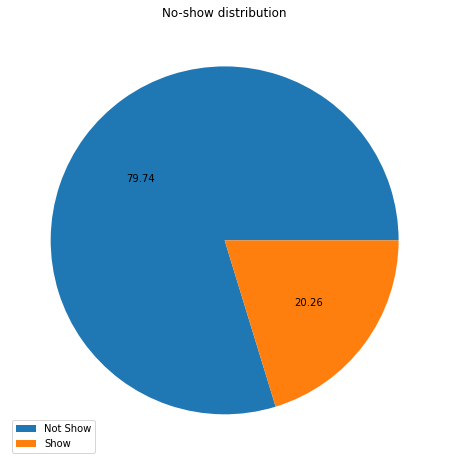

In [28]:
myplot('No-show',['Not Show','Show'],"No-show distribution" )

From the above pie plot, we conclude that<br>
- 79.74% of the patients did not come to the appointment 
- Only 20.26 patients come to the appointment

<a id="hypertension_distribution"></a>
## Pie plot of gender,hypertenstion and No-show

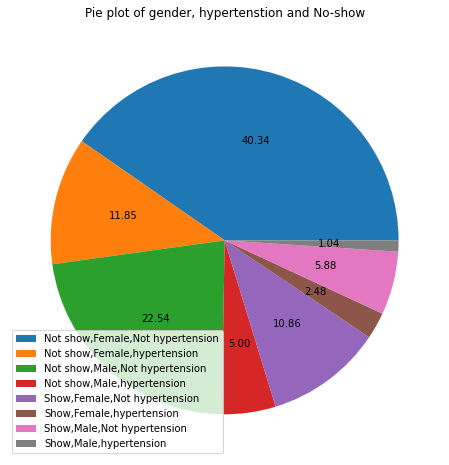

In [29]:
myplot(["No-show","Gender", "Hypertension"],['Not show,Female,Not hypertension','Not show,Female,hypertension','Not show,Male,Not hypertension','Not show,Male,hypertension', 'Show,Female,Not hypertension', 'Show,Female,hypertension','Show,Male,Not hypertension','Show,Male,hypertension'],"Pie plot of gender, hypertenstion and No-show" )

<b>Patient Male
- 22.54% not having hypertension did not come to the appointment<br>
- 5.88% not having hypertension came to the appointment<br>
- 5% of having hypertension did not come to the appointment<br>
- 1.04% having hypertension came to the appointment<br><br>

<b>Patient female
- 40.34% not having hypertension did not come to the appointment<br>
- 10.86% not having hypertension  came to the appointment<br>
- 2.48% having hypertension came to the appointment<br>
- 11.85% having hypertension did not come to the appointment<br><br>   




<a id="diabetes_distribution"></a>
## Pie plot of gender,diabetes and No-show

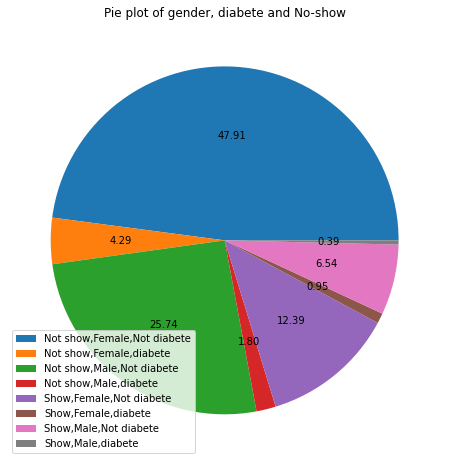

In [30]:
myplot(["No-show","Gender", "Diabetes"],['Not show,Female,Not diabete','Not show,Female,diabete','Not show,Male,Not diabete','Not show,Male,diabete', 'Show,Female,Not diabete', 'Show,Female,diabete','Show,Male,Not diabete','Show,Male,diabete'],"Pie plot of gender, diabete and No-show")

<b>Patient Male
- 25.74% not having diabetes did not come to the appointment<br>
- 6.54% not having diabetes came to the appointment<br>
- 1.8% of having diabetes did not come to the appointment<br>
- 0.39% having diabetes came to the appointment<br><br>

<b>Patient female
- 47.91% not having diabetes did not come to the appointment<br>
- 12.39% not having diabetes  came to the appointment<br>
- 0.95% having diabetes came to the appointment<br>
- 4.29% having diabetes did not come to the appointment<br><br>   


<a id="SMS_received_distribution"></a>
## Pie plot of gender,SMS_received and No-show

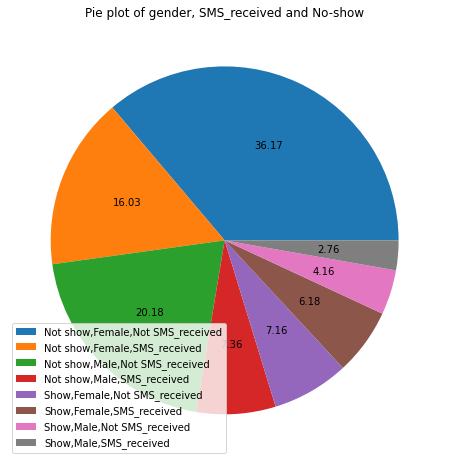

In [31]:
myplot(["No-show","Gender", "SMS_received"], ['Not show,Female,Not SMS_received','Not show,Female,SMS_received','Not show,Male,Not SMS_received','Not show,Male,SMS_received', 'Show,Female,Not SMS_received', 'Show,Female,SMS_received','Show,Male,Not SMS_received','Show,Male,SMS_received'],"Pie plot of gender, SMS_received and No-show")

<b>Patient Male
- 20.18% did not received sms did not come to the appointment<br>
- 4.16% did not received sms came to the appointment<br>
- 7.36% received sms did not come to the appointment<br>
- 2.76% received sms  came to the appointment<br><br>

<b>Patient female
- 36.17% not received sms did not come to the appointment<br>
- 7.16% not received sms  came to the appointment<br>
- 6.18% received sms came to the appointment<br>
- 16.03% received sms did not come to the appointment<br><br>   


<a id="gender_distribution"></a>
## Pie plot of gender and No-show

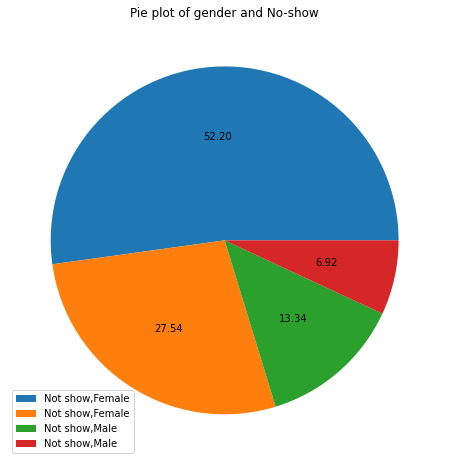

In [32]:
myplot(["No-show","Gender"],['Not show,Female','Not show,Female','Not show,Male','Not show,Male', 'Show,Female', 'Show,Female','Show,Male','Show,Male'],"Pie plot of gender and No-show")

<b>Patient Male<br>
- Out of 34.46% of male, only 6.92% came to the appointment<br><br>
<b>Patient female<br>
- Out of 65.54 of female, only 13.34% came to the appointment

<a id="function_distribution"></a>
## Function to plot the distribution in the research  question

In [33]:
def distributionPlot(feature,titleplot):
    gender_column = 'Gender'
    df.groupby(['No-show',feature, gender_column]).size().unstack(level=1).plot(kind='bar',title=titleplot,ylabel='count')
    print(pd.DataFrame(df.groupby(['No-show',feature]).count().PatientId))
    

<a id="no-show_distributionbar"></a>
## No-show gender distribution

                PatientId
No-show Gender           
No      F           55843
        M           29464
Yes     F           14275
        M            7405


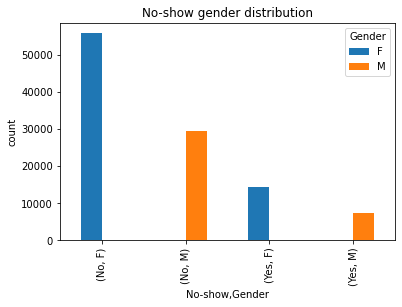

In [34]:
distributionPlot('Gender','No-show gender distribution')

From the bar plot above we notice:
- 14275 female patients showed up to the appointment
- 7405 male patients showed up to the appointment
- 55843 female patients did not show up to the appointment
- 29464 male patients did not show up to the appointment

<a id="diabetes_distributionbar"></a>
## Diabetes No-show gender distribution

                  PatientId
No-show Diabetes           
No      0             78794
        1              6513
Yes     0             20250
        1              1430


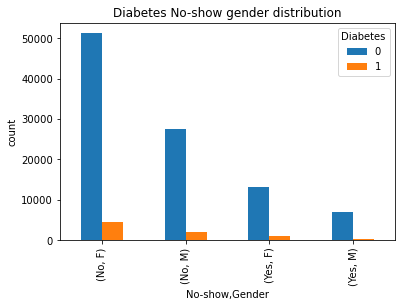

In [37]:
distributionPlot('Diabetes','Diabetes No-show gender distribution')

We notice that 1200 female patients with diabete show up to the appointment and
230  male patients with diabete show up to the appointment. 
Besides 15k female patients without diabete show up to the appointment and  6k patient male without diabete  showed to the appointment.
Moreover, 52k female not having diabete did not come to the appointment and 4k female having diabete did not come to the appointment.
Finally, 28k of male patient not having diabete did not come to the appointment and 2k male patient having diabete did not come to the appointment

<a id="hypertension_distributionbar"></a>
## Hypertension No-show gender distribution

                      PatientId
No-show Hypertension           
No      0                 67278
        1                 18029
Yes     0                 17908
        1                  3772


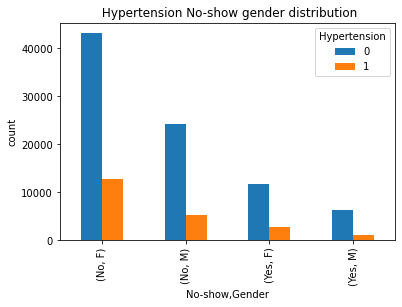

In [81]:
distributionPlot('Hypertension',' Hypertension No-show gender distribution')

We notice that most almost 2500 female patient hypertension show up to the appointment and 1272 male patient with Hypertension did not show to the appointment
Besides, 12k female patient without hypertension show up to the appointment and 6k male patient without hypertension show up to the appointment

<a id="SMS_distributionbar"></a>
## SMS_received No-show gender distribution

                      PatientId
No-show SMS_received           
No      0                 60290
        1                 25017
Yes     0                 12112
        1                  9568


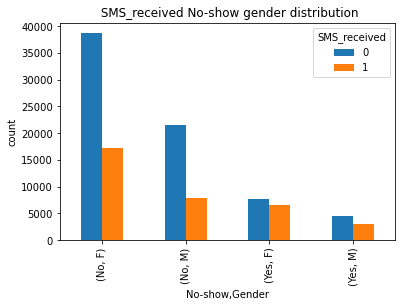

In [85]:
distributionPlot('SMS_received',' SMS_received No-show gender distribution')

We notice that 8k patient female who did not receive a sms showed up to the appointment
7k patient females who received a sms show up to the appointment
4k patient male who did not receive a sms showed up to the appointment
3k patient male who received a sms showed up to the appointment
38k patient female who did not receive sms did not come to the appointment
17k patient female who received sms did not come to the appointment
22k patient male who did not receive sms did not come to the appointment
7k patient male who did not receive the sms did not come to the appointment

<a id="Age_distributionbar"></a>
## Age No-show gender distribution

,mean,std
No-show,,
No,39.075187,22.649713
Yes,35.329151,21.470631


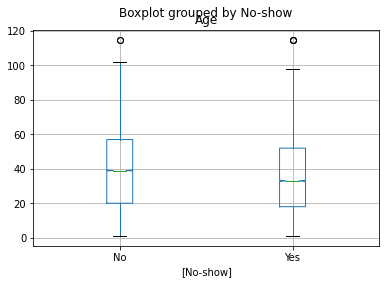

In [98]:
boxplot = df.boxplot(column=['Age'] , by = ['No-show'] , notch = True, labels=['No-show','Age'])
pd.DataFrame(df.groupby(['No-show'])['Age'].describe().loc[:,['mean','std']])

We notice that the average age of patient who did not show up are 39.07 and the average age of patients who showed up to the appointment are 35.32
We notice that 25% of the patient who did not show up to the appointment are aged around 20 and 25% of the patients who showed up to the appointment are  19
Further more 75% of the patients who did not showed up are 58 and 75% of the patients who showed up to the appointment are 47

<a id='conclusions'></a>
## Conclusion

We notice that few patients respond to appointment given by the physicians in Brazil<br>
<b>The gender distribution revealed that<br>
- 14275 female patients showed up to the appointment<br>
- 7405 male patients showed up to the appointment<br>
- 55843 female patients did not show up to the appointment<br>
- 29464 male patients did not show up to the appointment.<br>
<b>The hypertension patient distribution revealed that<br>
- 2500 female patient hypertension show up to the appointment<br>
- 1272 male patient with Hypertension did not show to the appointment<br>
- 12k female patient without hypertension show up to the appointment<br>
- 6k male patient without hypertension show up to the appointment<br>
<b>The diabetes patient distribution revealed that<br>
- 1200 female patients with diabete showed up to the appointment<br>
- 230  male patients with diabete show up to the appointment.<br>
- 15k female patients without diabete showed up to the appointment<br>
- 6k  male patients without diabete showed to the appointment.<br>
- 52k female not having diabete did not come to the appointment<br>
- 4k female having diabete did not come to the appointment.<br>
<b>The SMS_received patient distribution revealed that<br>
- 7k patient females who received a sms show up to the appointment<br>
- 4k patient male who did not receive a sms showed up to the appointment<br>
- 3k patient male who received a sms showed up to the appointment<br>
- 38k patient female who did not receive sms did not come to the appointment<br>
- 17k patient female who received sms did not come to the appointment<br>
- 22k patient male who did not receive sms did not come to the appointment<br>
- 7k patient male who did not receive the sms did not come to the appointment<br>  
From the above research question, we conclude that SMS_received influenced patient to show up to their appointment more that the other feature variables.<br>
 The above summary  did not  not reflect the actual data entry from the hospital cause it contained some discrepancies. 3,540 observations were dropped during the analysis to arrived at the above conclusion. Additional information would have been handy to explain the reason why we have zero and negative one  in the indepedent variable Age.
    


<a id='limitations'></a>
## Limitations

The dataset submit to our analysis in this project contains some data entry errors which affect the outcome of our analysis.
Out of the  110,527 observations, we found a negative Age in observation row index 99832 of the observations. Moreover, we found out that there were 3539 observations having Age value to be 0.
We assumed those discrepancies were some errors therefore we dropped 3,540 observations. 
Our analysis was carried out on 106,987 observations after cleaning the dataset which did not represent the actual population of the patients which might change the outcome of our result. 
We further need to know the distance of the patients to the nearest hospital where the appointment has been booked to figure out which few patients respond to their medical appointment.
We need further to know why the hospital prefers text message over phone call since most of people don't read they sms often.

Reference
https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib
https://stackoverflow.com/questions/59186534/matplotlib-bar-chart-that-displays-the-x-values-for-male-and-females#59186587